This assignment is part III of your evaluation process. You should address every question of the assignment on the cell below. If you decide to write any explanation, you should do so commenting on your code cells or by creating a new markdown cell. Feel free to edit our customize the notebook as you wish, as long as it can be easily reproduced for evaluation.

**Name:** Wandercleyson Marchiori Scheidegger

**CPF**:

**Date**: 15/09/2021

# Assignment 3 - Exploratory Data Analysis (EDA)

When you first get your data, it’s very tempting to immediately begin fitting models and assessing how they perform. However, before you begin modeling, it’s absolutely essential to explore the structure of the data and the relationships between the variables in the data set.

Do a detailed EDA of the **ames_train** data set, to learn about the structure of the data and the relationships between the variables in the data set . Your EDA should involve creating and reviewing many plots/graphs and considering the patterns and relationships you see.

You may find out that the data could use some cleaning.

After you have explored completely, make sure you create at least four graphs/plots that you found most informative during your EDA process, and briefly explain what you learned from each (why you found each informative).

PS: notice that the first column is in index, you might not need to import it

### Important:

You may use any libraries you want. However a 'requirements.txt' file is expected, so that the necessary dependencies can be installed in a virtual environment using the command 'pip install requirements.txt'

In [298]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

In [299]:
ames_train = pd.read_csv('ames_train.csv', sep=";", encoding='utf8').drop(columns='Unnamed: 0')

ames_test = pd.read_csv('ames_test.csv', sep=";", encoding='utf8').drop(columns='Unnamed: 0')

# Valores Nulos

In [300]:
count_nulls = pd.DataFrame(ames_train[ames_train.columns[ames_train.isna().any()]].isna().sum().sort_values(ascending=False), columns=['Qtde'])
count_nulls['Coluna'] = count_nulls.index

fig1 = px.bar(count_nulls, x="Qtde", y="Coluna", color="Coluna", text='Qtde', template='seaborn')

fig1.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Quantidade de valores nulos por característica',
    showlegend=False,
    xaxis_title="Quantidade",
    yaxis_title="Característica",
    width=800, 
    height=800,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
 
fig1.show()

In [301]:
#casas com area de piscina
ames_train[ames_train['Pool.Area'] != 0]

,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
65,40065,2470,615000,20,RL,106.0,12720,Pave,NaN,Reg,...,216,144,Ex,NaN,NaN,0,2,2008,WD,Normal
487,40487,2646,260000,80,RL,100.0,14330,Pave,NaN,IR1,...,0,800,Gd,GdPrv,NaN,0,1,2006,WD,Normal
595,40595,2784,250000,60,RL,80.0,16692,Pave,NaN,IR1,...,440,519,Fa,MnPrv,TenC,2000,7,2006,WD,Normal


In [302]:
#quantidade de casas com lareira
len(ames_train[ames_train['Fireplaces'] > 0])

509

In [303]:
#avaliar se há caracteristicas com apenas um valor para todas as amostras do treino
[col for col in ames_train.columns if len(ames_train[col].unique()) == 1]

['Utilities']

In [304]:
#avaliar se há caracteristicas com apenas um valor para todas as amostras do teste
[col for col in ames_test.columns if len(ames_train[col].unique()) == 1]

['Utilities']

In [305]:
ames_train['Utilities'].unique()

array(['AllPub'], dtype=object)

# Annotações

* Pela análise é possível notar que a maioria das casas não possui piscina (Pool), cerca (Fence), beco (Alley) e quase metade não possui lareira (Fireplaces)

* As features 'Pool.QC', 'Misc.Feature', 'Alley', 'Fence' podem ser descartadas do modelo, assim como 'Utilities' por possuir apenas um valor para todo o dataset.

* 'Fireplace.Qu' pode ter relação já que há cerca de 50 % das casas com lareira

# Analisando as correlações

In [306]:
#descartando as caracteristicas
ames_train_new = ames_train.drop(columns=['Pool.QC', 'Misc.Feature', 'Alley', 'Fence', 'Utilities', 'PID'])

In [307]:
#seleciona as características não numéricas
str_features = [item for item in ames_train_new.columns if ames_train_new[item].dtype == 'object']

In [308]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [309]:
#clona o dataset
ames_train_new_all_numeric = ames_train_new.copy()


#converte as colunas
for col in str_features:
    ames_train_new_all_numeric[col] = LE.fit_transform(ames_train_new_all_numeric[col])

In [310]:
corr = ames_train_new_all_numeric.corr()

In [311]:
corr_new = pd.DataFrame(corr['price'].sort_values(ascending=False)[1:26]).round(3).rename(columns={'price':'Correlacao'})
corr_new['Feature'] = corr_new.index

fig2 = px.bar(corr_new, x="Correlacao", y="Feature", color="Feature", text='Correlacao', template='seaborn')

fig2.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Maiores Correlações com o preço de Venda',
    showlegend=False,
    xaxis_title="Correlação",
    yaxis_title="Feature",
    width=800, 
    height=800,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
 
fig2.show()

In [312]:
corr_new_ = pd.DataFrame(corr['price'].sort_values()[1:26]).round(3).rename(columns={'price':'Correlacao'})
corr_new_['Feature'] = corr_new_.index

fig3 = px.bar(corr_new_, x="Correlacao", y="Feature", color="Feature", text='Correlacao', template='seaborn')

fig3.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Menores Correlações com o preço de Venda',
    showlegend=False,
    xaxis_title="Correlação",
    yaxis_title="Feature",
    width=800, 
    height=800,
    uniformtext_minsize=10, 
    uniformtext_mode='hide',
)
 
fig3.show()

# Teste de Hipotese nula com as principais features

In [313]:
from scipy.stats import hypergeom

In [314]:
colunas = corr['price'].sort_values(ascending=False)[1:3].index.tolist()
colunas.append('price')

teste1 = ames_train_new[colunas]


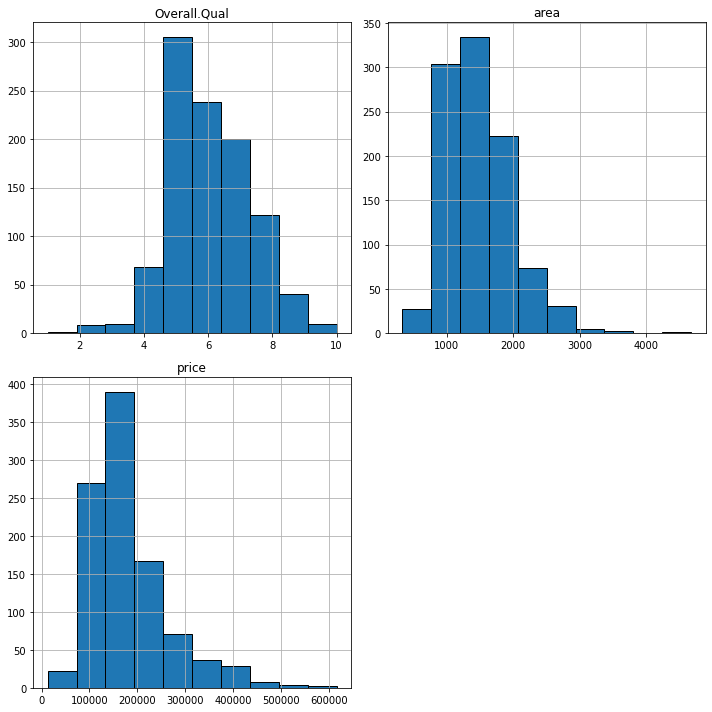

In [315]:
teste1.hist(figsize=(10,10), ec="k")
plt.tight_layout()
plt.show();

In [316]:
#criando os bins das variáveis

teste1['Overall.Qual_bin'] = teste1['Overall.Qual'].apply(lambda x: 'baixo' if x < 5 else ('medio' if x > 4 and x < 8 else 'alto'))

teste1['area_bin'] = teste1['area'].apply(lambda x: '1-Menor que 1000 fts' if x < 1000 \
    else ('2-De 1000 a 2000 fts' if x >= 1000 and x < 2000 \
        else ('3-De 2000 a 3000 fts' if x >= 2000 and x < 3000 else '4-Maior que 3000 fts')))

teste1['price_bin'] = teste1['price'].apply(lambda x: '1-Menor que 100.000' if x < 100000 \
    else ('2-De 100.000 a 200.000' if x >= 100000 and x < 200000 \
        else ('3-De 200.000 a 400.000' if x >= 200000 and x < 400000 else '4-Maior que 400.000')))


In [317]:
def hipotese(df, feature, y):
    y_res = df[y].unique()
    feature_res = df[feature].unique()
    N = df.shape[0]
    lista = []

    for i in y_res:
        for j in feature_res:
            
            K = sum(df[y] == i)
            n = sum(df[feature]==j)
            x = sum((df[feature]==j) & (df[y]==i))
            P = hypergeom.sf(x-1, N, n, K)

            if P < 0.05:
                result = 'Rejeitada'
            else:
                result = 'Aceita'

            lista.append([j, i, P, result])
    
    return pd.DataFrame(lista, columns=[feature, y, 'Valor','Hip_nula']).sort_values(by=[feature, y]).reset_index(drop=True)


In [318]:
df__ = hipotese(teste1, 'Overall.Qual_bin', 'price_bin')
df__

,Overall.Qual_bin,price_bin,Valor,Hip_nula
0,alto,1-Menor que 100.000,1.000000e+00,Aceita
1,alto,2-De 100.000 a 200.000,1.000000e+00,Aceita
2,alto,3-De 200.000 a 400.000,5.867027e-52,Rejeitada
3,alto,4-Maior que 400.000,2.029334e-18,Rejeitada
4,baixo,1-Menor que 100.000,6.086901e-37,Rejeitada
5,baixo,2-De 100.000 a 200.000,9.999976e-01,Aceita
6,baixo,3-De 200.000 a 400.000,1.000000e+00,Aceita
7,baixo,4-Maior que 400.000,1.000000e+00,Aceita
8,medio,1-Menor que 100.000,1.000000e+00,Aceita
9,medio,2-De 100.000 a 200.000,1.537747e-59,Rejeitada


In [319]:
df__ = hipotese(teste1, 'area_bin', 'price_bin')
df__

,area_bin,price_bin,Valor,Hip_nula
0,1-Menor que 1000 fts,1-Menor que 100.000,3.955069e-27,Rejeitada
1,1-Menor que 1000 fts,2-De 100.000 a 200.000,1.790301e-01,Aceita
2,1-Menor que 1000 fts,3-De 200.000 a 400.000,1.000000e+00,Aceita
3,1-Menor que 1000 fts,4-Maior que 400.000,1.000000e+00,Aceita
4,2-De 1000 a 2000 fts,1-Menor que 100.000,1.000000e+00,Aceita
5,2-De 1000 a 2000 fts,2-De 100.000 a 200.000,8.045312e-15,Rejeitada
6,2-De 1000 a 2000 fts,3-De 200.000 a 400.000,9.678066e-01,Aceita
7,2-De 1000 a 2000 fts,4-Maior que 400.000,1.000000e+00,Aceita
8,3-De 2000 a 3000 fts,1-Menor que 100.000,1.000000e+00,Aceita
9,3-De 2000 a 3000 fts,2-De 100.000 a 200.000,1.000000e+00,Aceita


# Analise de feature usando ExtraTreesClassifier()

In [320]:
from sklearn.ensemble import ExtraTreesClassifier

In [321]:
X = ames_train_new_all_numeric.drop(columns='price').dropna()
Y = ames_train_new_all_numeric.dropna()[['price']]

In [322]:
selection = ExtraTreesClassifier()
selection.fit(X,Y['price'])

ExtraTreesClassifier()

In [323]:
feature_list = list(X.columns)

In [324]:
importances = list(selection.feature_importances_)

feature_importances = [(feature, round(importance * 100, 2)) for feature, importance in zip(feature_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
 
#[print('Variável: {:20} Importância: {}'.format(*pair)) for pair in feature_importances[0:20]]

In [325]:
feat02 = pd.DataFrame(feature_importances[1:26], columns=['Variavel', 'Importancia'])

In [326]:
fig4 = px.bar(feat02, x="Importancia", y="Variavel", color="Variavel", text='Importancia', template='seaborn')

fig4.update_layout(
    margin=dict(l=20, r=50, t=50, b=20),
    title = 'Feature Importance - Teste ExtraTreesClassifier',
    showlegend=False,
    xaxis_title="Importancia [%]",
    yaxis_title="Variável",
    legend_title="Deficiência",
    width=800, 
    height=800,
    uniformtext_minsize=9, 
    uniformtext_mode='hide',
)
 
fig4.show()

# Análise com sns pairplot

## Plot de análise do primeiro teste correlação

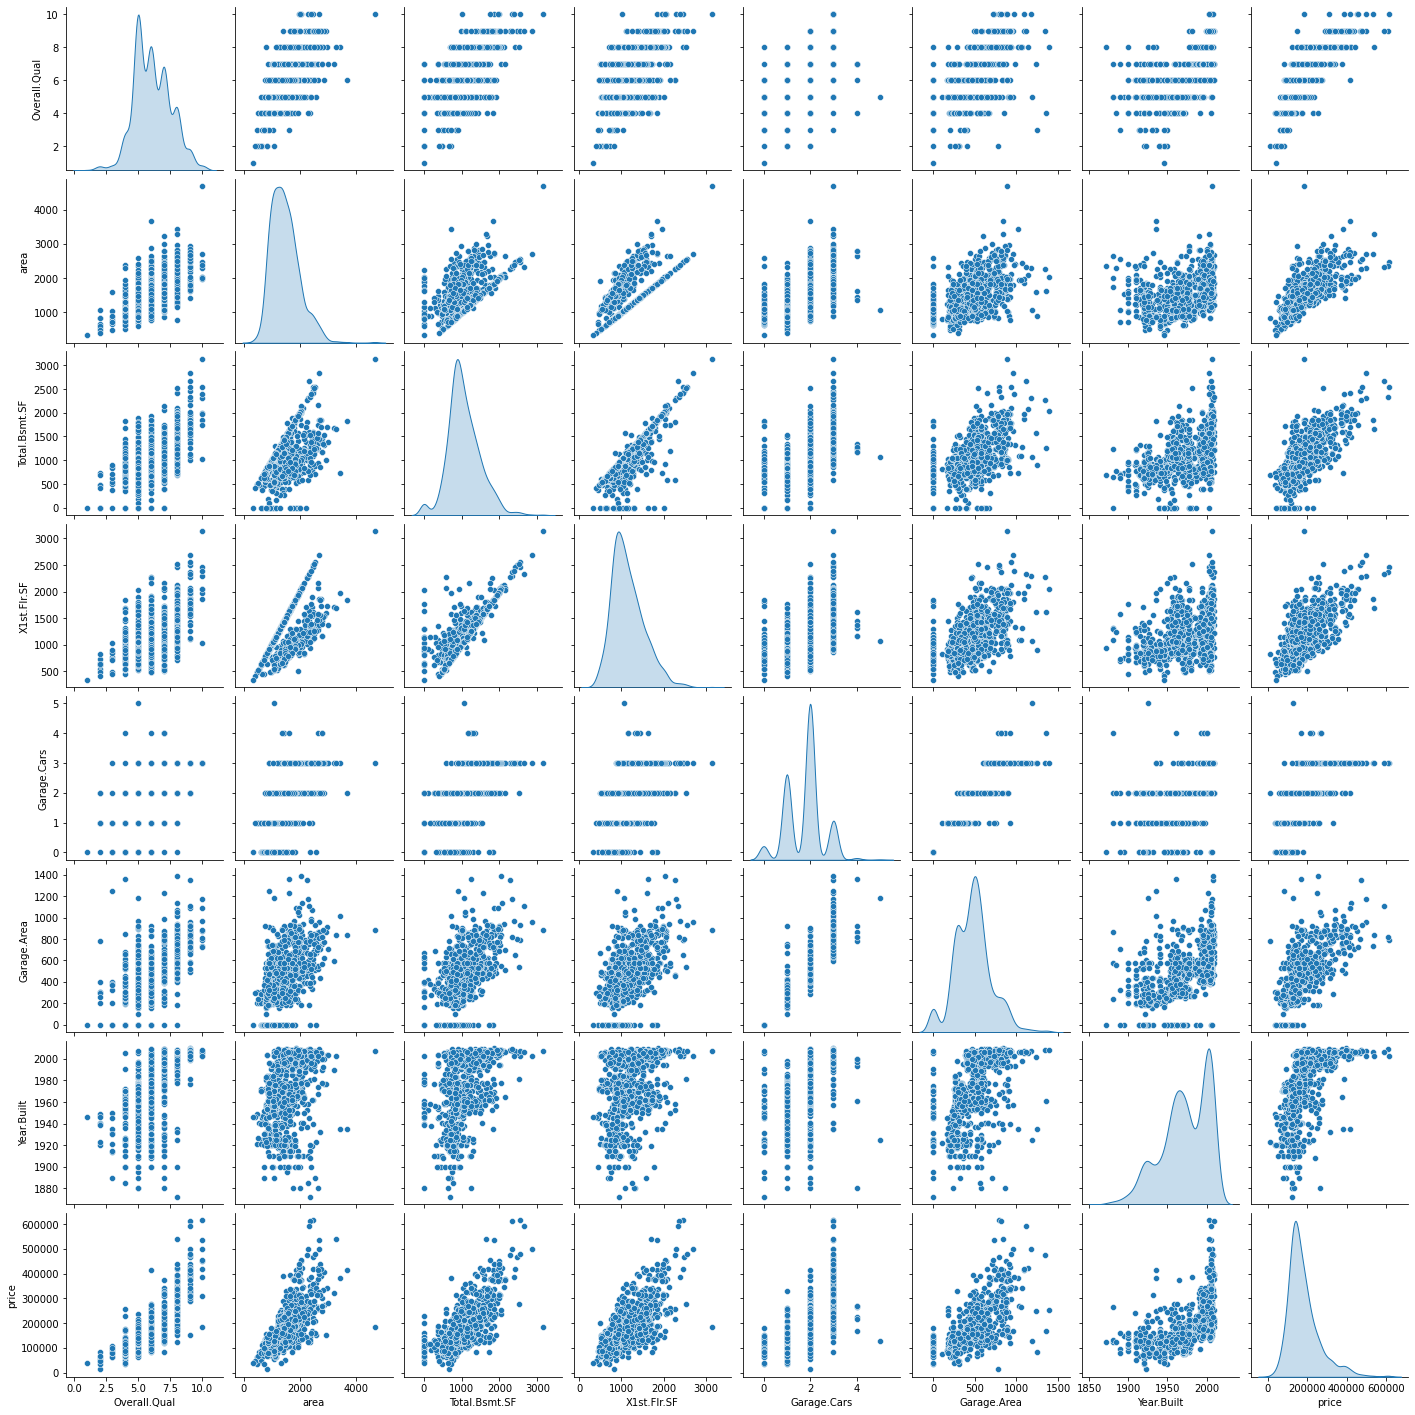

In [327]:
coll2 = corr_new.Feature.tolist()[:7]
coll2.append('price')

sns.pairplot(ames_train[coll2], diag_kind = 'kde')


## Observações

* As maiores correlações ficam demonstradas nos gráficos analisados na coluna price. è possível notar forte correlação positiva com a variável Overall.Qual
* É possível notar também algumas correlações de causalidade como o tamanho do primeiro piso e o tamanho do porão

## Plot de análise do segundo teste (Feature Importances com ExtraTreesClassifier)

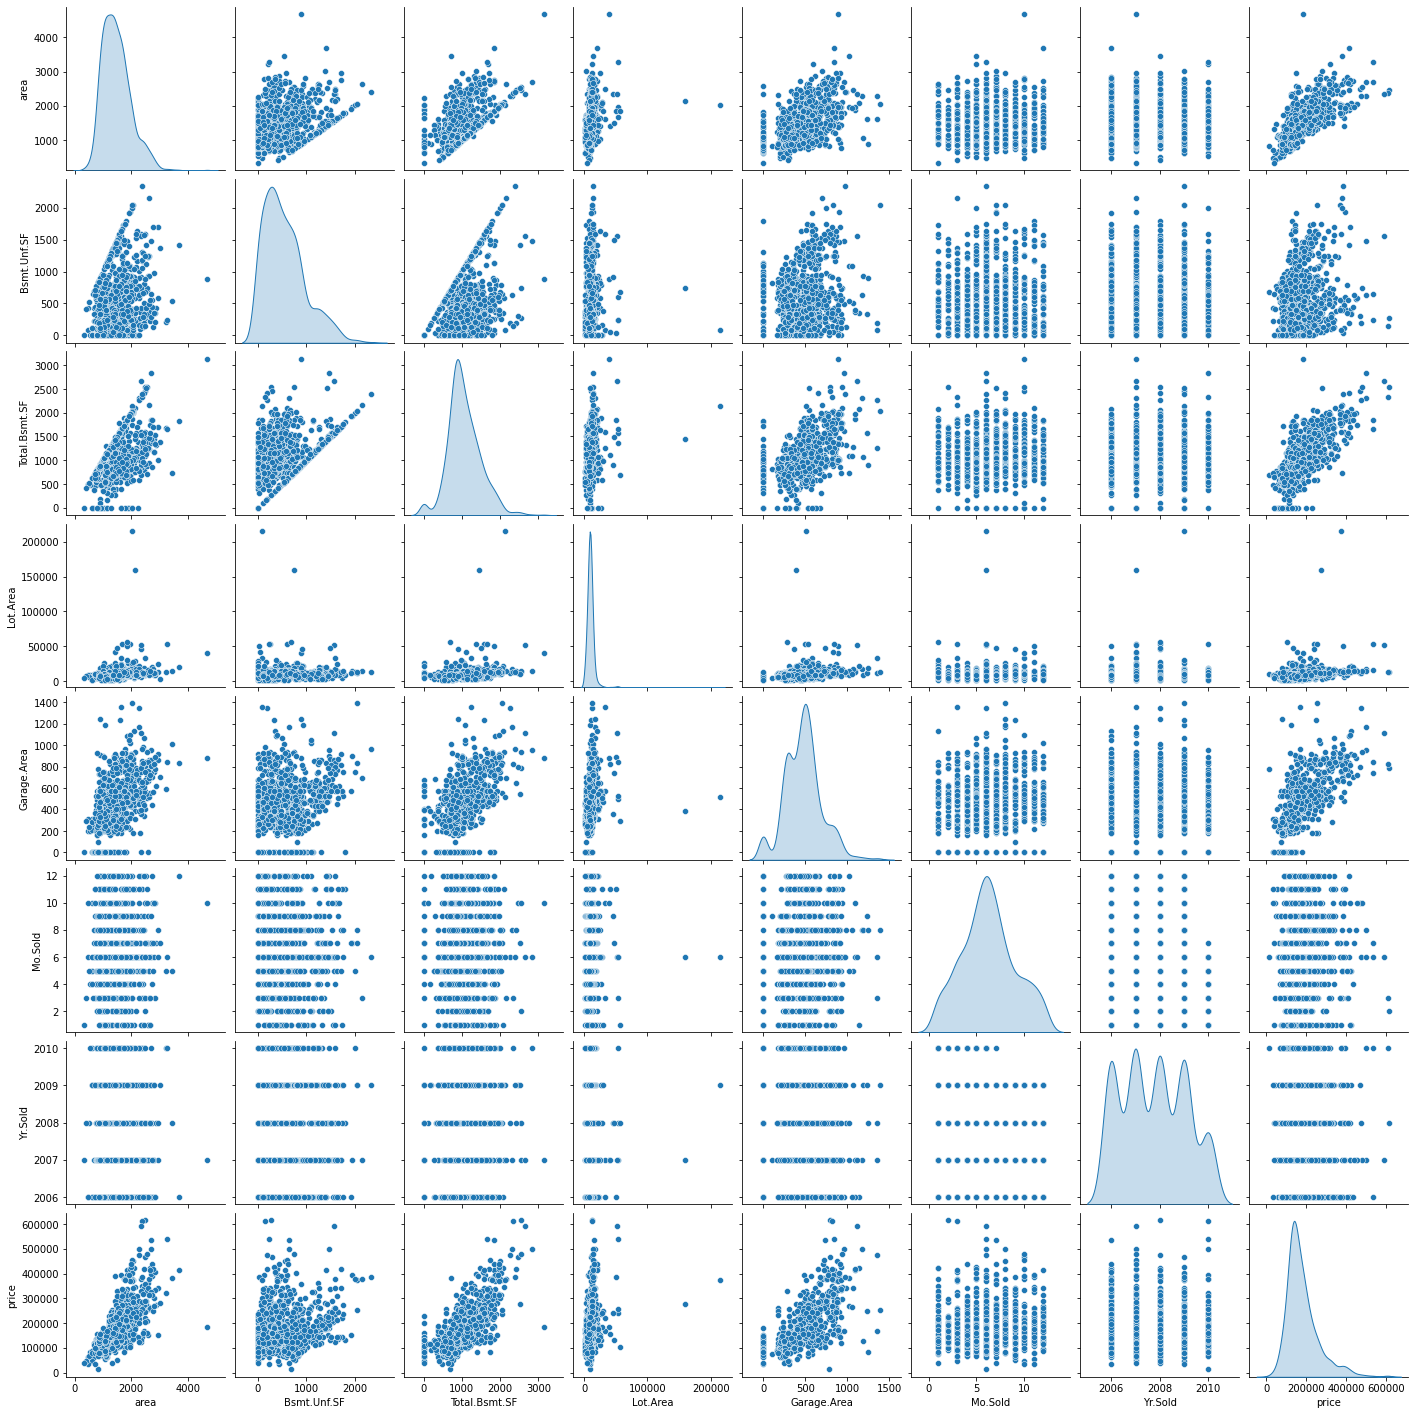

In [328]:
coll = feat02.Variavel[:7].tolist()
coll.append('price')

sns.pairplot(ames_train[coll], diag_kind = 'kde')

## Observações

* O teste não comprovou uma nítida correlação entre Lot.Area, Mo.Sold e Yr.Sold
* O teste utilizou Arvoress de decisão para a classificaçao das features

# DASHBOARD

In [329]:
plot01 = count_nulls.plot_bokeh(kind='barh', show_figure=False, legend=False, color='#4DB6AC', title ="Valores Faltantes", ylabel="Feature")

plot02 = corr_new_[1:26].plot_bokeh(kind='barh', stacked=True, show_figure=False, legend=False, color='#FFA726', title ="Menores correlações com o preço de venda", ylabel="Feature")

plot03 = corr_new[1:26].plot_bokeh(kind='barh', stacked=True, show_figure=False, legend=False, color='#424242', title ="Maiores correlações com o preço de venda", ylabel="Feature")

feat02.index = feat02.Variavel
plot04 = feat02.plot_bokeh(kind='barh', stacked=True, show_figure=False, legend=False, color='#5C6BC0', title ="Resultado do teste de Feature Importances", ylabel="Feature")

In [330]:
#Make Dashboard with Grid Layout: 
pandas_bokeh.plot_grid([[plot01, plot02],[plot03,plot04]], plot_width=700, plot_height=700)

Column(id='2019', ...)

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Análises Finais

* Em uma primeira limpeza dos dados foi possível averiguar que a maioria das casas vendidas não possuiam piscina, cerca e passagem em formato de beco e quase metade não possuia lareira, conforme gráfico superior à esquerda. A análise de dados faltantes é importante para retirar do modelo a ser implementado, características que não contribuem para o preço de venda da casa.

* As features ‘Pool.QC’, ‘Misc.Feature’, ‘Alley’, ‘Fence’ podem ser descartadas do modelo, assim como ‘Utilities’ por possuir apenas um valor único para todo o dataset.

* ’Fireplace.Qu’ não foi retirado inicialmente já que há cerca de 50 % das casas possuiam lareira, mas a análise demonstrou que a feature tem uma das menores correlações com o preço de venda e também pode ser removido do dataset

* O primeiro teste avaliou a correlação entre as variáveis e o preço de venda. O teste teve o intuito principal de selecionar as variáveis que melhor se relacionam com o preço de venda, lembrando que duas variáveis correlacionadas não necessariamente geram causalidade. Não é possível afirmar com certeza que um incremento de área sempre causa um aumento de preço. Para inferir causalidade são necessários mais testes, por exemplo, testes de Estatística Beysiana. O resultado as features com maior correlação pode ser visualizado no grafico inferior à esquerda.

* As correlações averiguadas no primeiro teste foram validadas com um teste de Hipótese Nula aplicado  uma distribuição de probabilidade discreta. O teste analisa a probabilidade de um valor da feature analisada gerar um resultado específico no preço de venda. Confirmada a hipótese nula, valor abaixo do limiar de 0.05, infere-se que há uma alta probabilidade desse valor específico da feature estar associado ao preço de vendada casa.

* Foram analisadas as 2 features com maior valor de correlação com o preço de venda e seus valores foram divididos em intervalos condizentes com a distribuição dos dados e os resultados podem ser visualizados nas tabelas abaixo:

In [331]:
df__ = hipotese(teste1, 'Overall.Qual_bin', 'price_bin')
df__

,Overall.Qual_bin,price_bin,Valor,Hip_nula
0,alto,1-Menor que 100.000,1.000000e+00,Aceita
1,alto,2-De 100.000 a 200.000,1.000000e+00,Aceita
2,alto,3-De 200.000 a 400.000,5.867027e-52,Rejeitada
3,alto,4-Maior que 400.000,2.029334e-18,Rejeitada
4,baixo,1-Menor que 100.000,6.086901e-37,Rejeitada
5,baixo,2-De 100.000 a 200.000,9.999976e-01,Aceita
6,baixo,3-De 200.000 a 400.000,1.000000e+00,Aceita
7,baixo,4-Maior que 400.000,1.000000e+00,Aceita
8,medio,1-Menor que 100.000,1.000000e+00,Aceita
9,medio,2-De 100.000 a 200.000,1.537747e-59,Rejeitada


In [332]:
df__ = hipotese(teste1, 'area_bin', 'price_bin')
df__

,area_bin,price_bin,Valor,Hip_nula
0,1-Menor que 1000 fts,1-Menor que 100.000,3.955069e-27,Rejeitada
1,1-Menor que 1000 fts,2-De 100.000 a 200.000,1.790301e-01,Aceita
2,1-Menor que 1000 fts,3-De 200.000 a 400.000,1.000000e+00,Aceita
3,1-Menor que 1000 fts,4-Maior que 400.000,1.000000e+00,Aceita
4,2-De 1000 a 2000 fts,1-Menor que 100.000,1.000000e+00,Aceita
5,2-De 1000 a 2000 fts,2-De 100.000 a 200.000,8.045312e-15,Rejeitada
6,2-De 1000 a 2000 fts,3-De 200.000 a 400.000,9.678066e-01,Aceita
7,2-De 1000 a 2000 fts,4-Maior que 400.000,1.000000e+00,Aceita
8,3-De 2000 a 3000 fts,1-Menor que 100.000,1.000000e+00,Aceita
9,3-De 2000 a 3000 fts,2-De 100.000 a 200.000,1.000000e+00,Aceita


* Todos os testes de hipotese confirmam a correlação existente entre as variáveis em questão (Area e Overall.Qual) e o preço de venda.

* Foi realizado um segundo teste (Feature Importances) utilizando um modelo de arvores de decisão com divisões aleatórias de todas as observações realizadas para garantir que o modelo não sofra overfiting memso com poucas amostras (ExtraTreesClassifier). O resultado obtido pode ser visualizado no dashboard, gráfico inferior à direita.

* Destaque para Lot.Area, primeiro colocado no ranking de importância e 22º no ranking de correlação.

* Os resultados distintos podem ser testados na criação de um modelo de predição de preços das casas

#### ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Optional Assignment - Predicting house prices

In building a model, it is often useful to start by creating a simple, intuitive initial model based on the results of the exploratory data analysis. 

You may feel like showcasing more advanced statistical skills. For this reason, we are providing testing data on *ames_test* data set so you can build a very simple model in order to predict the house prices given the data available on training data set. Use your imagination and let 

Note: The goal is not to identify the “best” possible model but rather to choose a reasonable and understandable starting point.

# Analise

* Partindo do principio de que varias correlações lineares foram encontradas no EDA uma boa premissa seria iniciar testando uma Regressão Linear

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [47]:
#cria as funções de calculo da mape

def calc_mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100

# Simplificando

* MAE  - media do erro.
* MSE  - pune os grandes erros - deve ser usado em problemas reais 
* RMSE  - interpretado como a quantidade de y que desviou
* MAPE - Erro absoluto em porcentagem (bem usado em forecasts)

In [45]:
#função de impressão dos resultados
def print_evaluate_model(true, predicted):

    r2_square = metrics.r2_score(true, predicted)
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    mape = calc_mape(true, predicted)

    print('R2 Square', r2_square)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('MAPE:', mape)
    

## Modelo

In [340]:
#substitui os valores null de Fireplace.Qu
ames_train['Fireplace.Qu'].fillna('0', inplace=True)
ames_test['Fireplace.Qu'].fillna('0', inplace=True)

X_train = ames_train.drop(columns=['Pool.QC', 'Misc.Feature', 'Alley', 'Fence', 'Utilities', 'PID', 'Lot.Frontage']).dropna()
X_test = ames_test.drop(columns=['Pool.QC', 'Misc.Feature', 'Alley', 'Fence', 'Utilities', 'PID', 'Lot.Frontage']).dropna()
Y_train = X_train[['price']]
Y_test = X_test[['price']]

#seleciona as características não numéricas
str_features = [item for item in X_train.columns if X_train[item].dtype == 'object']

#converte as colunas
for col in str_features:
    X_train[col] = LE.fit_transform(X_train[col])
    X_test[col] = LE.fit_transform(X_test[col])

X_train.drop(columns='price', inplace=True)
X_test.drop(columns='price', inplace=True)

In [341]:
#normalização
pipeline = Pipeline([('std_scalar', StandardScaler())])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [342]:
lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [343]:
pred = lin_reg.predict(X_test)

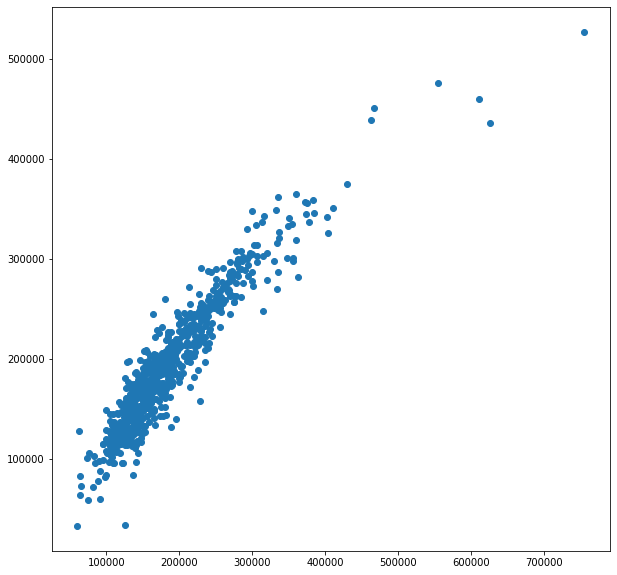

In [344]:
plt.figure(figsize=(10,10))
plt.scatter(Y_test, pred);

In [345]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Avaliação no dataset de teste:\n')
print_evaluate_model(Y_test, test_pred)


Avaliação no dataset de teste:

R2 Square 0.8673180795622594
MAE: 18800.919672122953
MSE: 688808091.9693592
RMSE: 26245.15368538274
MAPE: price    10.937828
dtype: float64


## ----------------------------------------------------------------------------------------------------------------------------------------------

In [346]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
rf_reg.fit(X_train, Y_train)

test_pred = rf_reg.predict(X_test)
train_pred = rf_reg.predict(X_train)

print('Avaliação no dataset de teste:\n')
print_evaluate_model(Y_test.price.tolist(), test_pred)

Avaliação no dataset de teste:

R2 Square 0.8651669940474485
MAE: 15566.344585430465
MSE: 699975288.7074788
RMSE: 26457.046106991587
MAPE: 8.231452986028671


# conclusão

* Mesmo utiilizando Random Forest Regressor em alguns indicadores, a regressão linear se comporta melhor.

* Os próximmos passos seriam treinar o modelo com as features selecionadas no EDA que demonstraram maior aderência ao modelo